In [12]:
import numpy as np
import pandas as pd
from scipy import interpolate
import processing
from tqdm import tqdm

In [24]:
df = pd.read_excel('lipid_subtype.xlsx')
df = df.dropna(axis=1,how='all')
x = df.iloc[:,::2]
y = df.iloc[:,1::2]
col_stats = {}

curr_min = np.inf
for col in x:
    if x[col].max() < 3100:
        continue
    count = x[col].count()
    if count < curr_min:
        row = count
    col_stats['Min'] = [row, col]

new_wavenumbers = np.linspace(2700, 3100, 61)
new_dataset = {}
new_dataset[''] = new_wavenumbers
for idx, col in enumerate(x):
    X = x.iloc[:,idx].dropna().to_numpy()
    Y = y.iloc[:,idx].dropna().to_numpy()
    if X.max() < 3070:
        continue
    spline = interpolate.CubicSpline(X, Y, extrapolate=True)
    spectra = spline(new_wavenumbers)
    new_dataset[col] = processing.normalize(spectra-spectra.min())

In [25]:
dataset_df = pd.DataFrame(new_dataset)

filename = 'lipid_subtype_CH_61.csv'

# Save DataFrame to CSV
# dataset_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

Dictionary saved to lipid_subtype_CH_61.csv


In [32]:
dataset_df

,,Phosphatidylethanolamine,Phospholipid,Cholesterol,Cardiolipin,Sphingosine,Cholesterol ester,Dsg-Phosphatidylinositol,L-alpha-Phosphatidylinositol,L-alpha-Phosphatidylglycerol,...,Omega-3 25-5,Ceramide 24-0,Ceramide 22-0,Ceramide 24-1,Phosphatidylcholine 18-1,Phosphatidylethanolamine 18-1,"Ceramide 18-1,22-0","Deoxyceramide 18-1,24-1","Deoxyceramide 18-1,16-0","Dihydroceramide 18-0,14-0"
0,2700.000000,0.015953,0.034726,0.034251,0.033501,0.040557,0.042721,0.038351,0.037082,0.040457,...,0.005769,0.035869,0.038291,0.011001,0.051041,0.062547,0.047522,0.024202,0.027763,0.020353
1,2706.666667,0.027160,0.041152,0.035156,0.040575,0.047288,0.058051,0.046702,0.047030,0.052683,...,0.013409,0.046533,0.047475,0.023054,0.060224,0.071496,0.057975,0.034349,0.037606,0.029734
2,2713.333333,0.035808,0.044762,0.050728,0.051831,0.059040,0.084389,0.059588,0.063185,0.071861,...,0.012303,0.057815,0.059764,0.035630,0.069591,0.080125,0.073331,0.038764,0.051376,0.051948
3,2720.000000,0.045121,0.054345,0.050740,0.059461,0.071656,0.071996,0.063446,0.074839,0.075826,...,0.039515,0.068337,0.070748,0.047086,0.075730,0.085103,0.090386,0.054088,0.061608,0.069585
4,2726.666667,0.051768,0.057098,0.037033,0.063232,0.076641,0.070325,0.073282,0.078013,0.082456,...,0.037647,0.068471,0.070753,0.050578,0.077725,0.090551,0.088489,0.054530,0.071006,0.071669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.006523,0.013175,0.003776,0.019199,0.002888,0.009161,0.005896,0.012077,0.006989,...,0.080275,0.004687,0.005440,0.009633,0.012536,0.009768,0.004876,0.005950,0.003304,0.008704
57,3080.000000,0.011062,0.008996,0.001363,0.012183,0.001632,0.005116,0.006172,0.007131,0.004165,...,0.038342,0.004199,0.004341,0.008280,0.007014,0.006425,0.003313,0.003434,0.002547,0.008167
58,3086.666667,0.010801,0.005606,0.000231,0.006513,0.001165,0.003373,0.003563,0.003959,0.005164,...,0.030270,0.003005,0.003683,0.004347,0.003557,0.002860,0.001915,0.002779,0.001514,0.007915
59,3093.333333,0.004683,0.004317,0.000000,0.003265,0.001327,0.000676,0.001309,0.002505,0.003304,...,0.021809,0.001902,0.002218,0.003843,0.001163,0.001220,0.000000,0.002360,0.001111,0.007982


In [39]:
lipid = dataset_df['Phospholipid'].to_numpy()

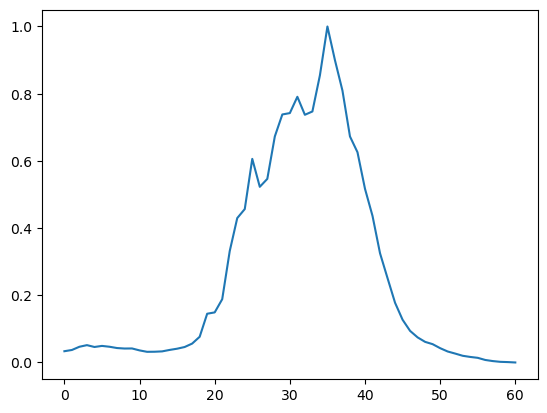

In [46]:
import matplotlib.pyplot as plt
plt.plot(lipid)

In [42]:
dataset_arr = dataset_df.iloc[0:,1:].to_numpy()
dataset_size = dataset_df.shape[1]
# denoising_arr = np.empty(int(((dataset_size-1) * (dataset_size)) / 2) + 1, dtype="float32")
new_dataset = {}
new_dataset[''] = new_wavenumbers
for j in tqdm(range(1, dataset_size - 2)):
    for i in range(j + 1, dataset_size - 1):
        combined_col = dataset_df.columns[j] + " + " + dataset_df.columns[i]
        temp_spectra = dataset_arr[:, j] + dataset_arr[:, i]
        new_dataset[combined_col] = processing.normalize(temp_spectra-temp_spectra.min())
denoising_df = pd.DataFrame(new_dataset)

filename = 'denoising_data_CH_61.csv'

# Save DataFrame to CSV
denoising_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

100%|██████████| 23/23 [00:00<00:00, 4991.15it/s]

Dictionary saved to denoising_data_CH_61.csv


In [43]:
denoising_df

,,Phosphatidylethanolamine + Phospholipid,Phosphatidylethanolamine + Cholesterol,Phosphatidylethanolamine + Cardiolipin,Phosphatidylethanolamine + Sphingosine,Phosphatidylethanolamine + Cholesterol ester,Phosphatidylethanolamine + Dsg-Phosphatidylinositol,Phosphatidylethanolamine + L-alpha-Phosphatidylinositol,Phosphatidylethanolamine + L-alpha-Phosphatidylglycerol,Phosphatidylethanolamine + Lyso-Phosphatidate,...,Phosphatidylcholine 18-1 + Phosphatidylethanolamine 18-1,"Phosphatidylcholine 18-1 + Ceramide 18-1,22-0","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylcholine 18-1 + Deoxyceramide 18-1,16-0","Phosphatidylethanolamine 18-1 + Ceramide 18-1,22-0","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,24-1","Phosphatidylethanolamine 18-1 + Deoxyceramide 18-1,16-0","Ceramide 18-1,22-0 + Deoxyceramide 18-1,24-1","Ceramide 18-1,22-0 + Deoxyceramide 18-1,16-0","Deoxyceramide 18-1,24-1 + Deoxyceramide 18-1,16-0"
0,2700.000000,0.033525,0.035414,0.048426,0.040374,0.041103,0.041809,0.045364,0.028763,0.037008,...,0.057997,0.043969,0.045428,0.039488,0.034723,0.040210,0.030066,0.026005,0.018965,0.021356
1,2706.666667,0.037194,0.042422,0.056890,0.051716,0.049415,0.051343,0.056618,0.043948,0.047102,...,0.068237,0.054065,0.054881,0.049204,0.045035,0.051074,0.040023,0.036724,0.028763,0.031691
2,2713.333333,0.046795,0.050139,0.066772,0.067328,0.058693,0.062851,0.070368,0.050077,0.057027,...,0.080893,0.060961,0.066148,0.065552,0.054932,0.066665,0.058883,0.046476,0.042123,0.051039
3,2720.000000,0.051597,0.059073,0.081052,0.065863,0.066253,0.075216,0.078543,0.055688,0.066435,...,0.092521,0.071694,0.073799,0.077538,0.071141,0.081272,0.076299,0.060180,0.058659,0.066023
4,2726.666667,0.046115,0.062460,0.086030,0.066428,0.073335,0.078667,0.084204,0.063355,0.070258,...,0.094395,0.074808,0.081267,0.081530,0.070413,0.085287,0.076393,0.065457,0.059926,0.072196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3073.333333,0.007486,0.016805,0.010333,0.011644,0.010727,0.014703,0.012167,0.012765,0.017360,...,0.007639,0.006417,0.006575,0.005340,0.004238,0.004289,0.002810,0.003101,0.003964,0.001942
57,3080.000000,0.004187,0.010993,0.006837,0.007357,0.008531,0.009390,0.007941,0.009866,0.010239,...,0.005050,0.003319,0.004513,0.003284,0.002196,0.003047,0.001756,0.001346,0.002433,0.001246
58,3086.666667,0.001924,0.006291,0.004356,0.004681,0.005157,0.005569,0.006498,0.006625,0.005952,...,0.002432,0.001089,0.002201,0.001261,0.001168,0.001746,0.000928,0.000441,0.001978,0.000555
59,3093.333333,0.001163,0.003935,0.003631,0.002603,0.003164,0.003972,0.004598,0.003500,0.003873,...,0.000555,0.000000,0.001173,0.000427,0.000000,0.000505,0.000000,0.000000,0.001801,0.000374


In [45]:
lipid = denoising_df[denoising_df.columns[1]].to_numpy()

In [9]:
filename = 'lipid_subtype_CH_61.csv'

# Save DataFrame to CSV
# dataset_df.to_csv(filename, index=False)

print(f"Dictionary saved to {filename}")

Dictionary saved to lipid_subtype_CH_61.csv
